# [LAB2] Tutorial PyTorch

    2) Regressão Não-Linear

## Importação de Bibliotecas

### Objetivo

Neste notebook, você irá aprender a utilizar o PyTorch para resolver problemas de **regressão linear**, **regressão não linear** e **classificação binária**. Ao final, será capaz de construir modelos simples e interpretar seus resultados.

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Parte 2 – Regressão Não Linear (y = 3x² - 10x + 6)

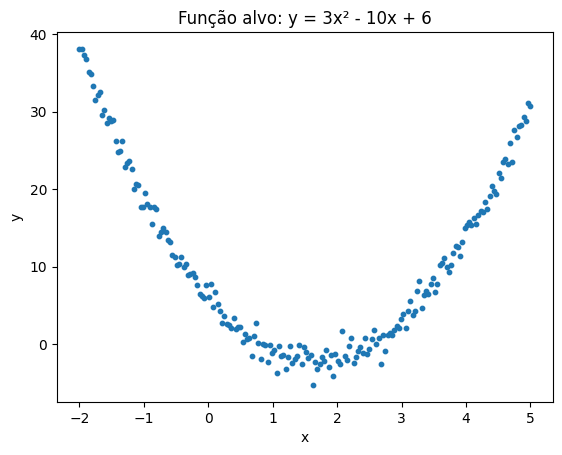

In [ ]:
# Dados quadráticos
x = torch.unsqueeze(torch.linspace(-2, 5, 200), dim=1)
y = 3 * x**2 - 10 * x + 6 + 1.0 * torch.randn(x.size())

plt.scatter(x.numpy(), y.numpy(), s=10)
plt.title("Função alvo: y = 3x² - 10x + 6")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# Modelo não linear
class RegressaoQuadratica(nn.Module):
    def __init__(self):
        super(RegressaoQuadratica, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
modelo = RegressaoQuadratica()
criterio = nn.MSELoss()
otimizador = torch.optim.Adam(modelo.parameters(), lr=0.01)

for epoca in range(500):
    saida = modelo(x)
    perda = criterio(saida, y)

    otimizador.zero_grad()
    perda.backward()
    otimizador.step()

    if (epoca + 1) % 20 == 0:
        print(f'Época {epoca+1}, Perda: {perda.item():.4f}')

Época 20, Perda: 117.4359
Época 40, Perda: 39.8398
Época 60, Perda: 29.4607
Época 80, Perda: 22.0235
Época 100, Perda: 16.5491
Época 120, Perda: 11.9226
Época 140, Perda: 8.2286
Época 160, Perda: 5.6172
Época 180, Perda: 3.9550
Época 200, Perda: 2.9683
Época 220, Perda: 2.4371
Época 240, Perda: 2.1463
Época 260, Perda: 1.9783
Época 280, Perda: 1.8658
Época 300, Perda: 1.7821
Época 320, Perda: 1.7164
Época 340, Perda: 1.6549
Época 360, Perda: 1.5927
Época 380, Perda: 1.5412
Época 400, Perda: 1.4996
Época 420, Perda: 1.4681
Época 440, Perda: 1.4385
Época 460, Perda: 1.4047
Época 480, Perda: 1.3749
Época 500, Perda: 1.3532


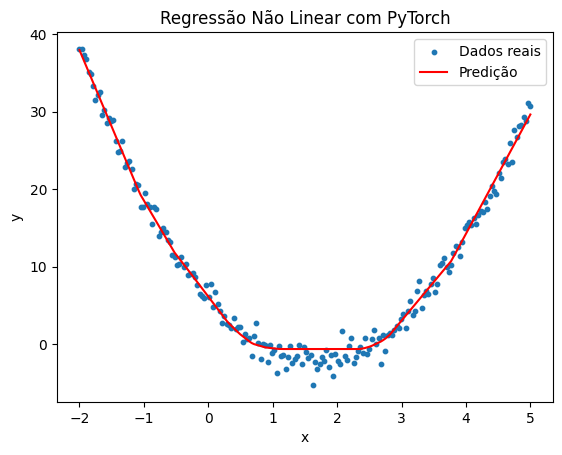

In [ ]:
# Visualização dos resultados
plt.scatter(x.numpy(), y.numpy(), s=10, label='Dados reais')
plt.plot(x.numpy(), modelo(x).detach().numpy(), color='red', label='Predição')
plt.legend()
plt.title("Regressão Não Linear com PyTorch")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Exercício 2

a) Altere o número de neurônios em cada camada (ex: `32`, `16`, `1`). Qual o número mínimo que funciona de forma apropriada?

b) Em seguida, troque `ReLU` por `Tanh`. Compare os resultados.

https://miro.medium.com/v2/resize:fit:1400/0*_-znXJj6VHO-f1bC

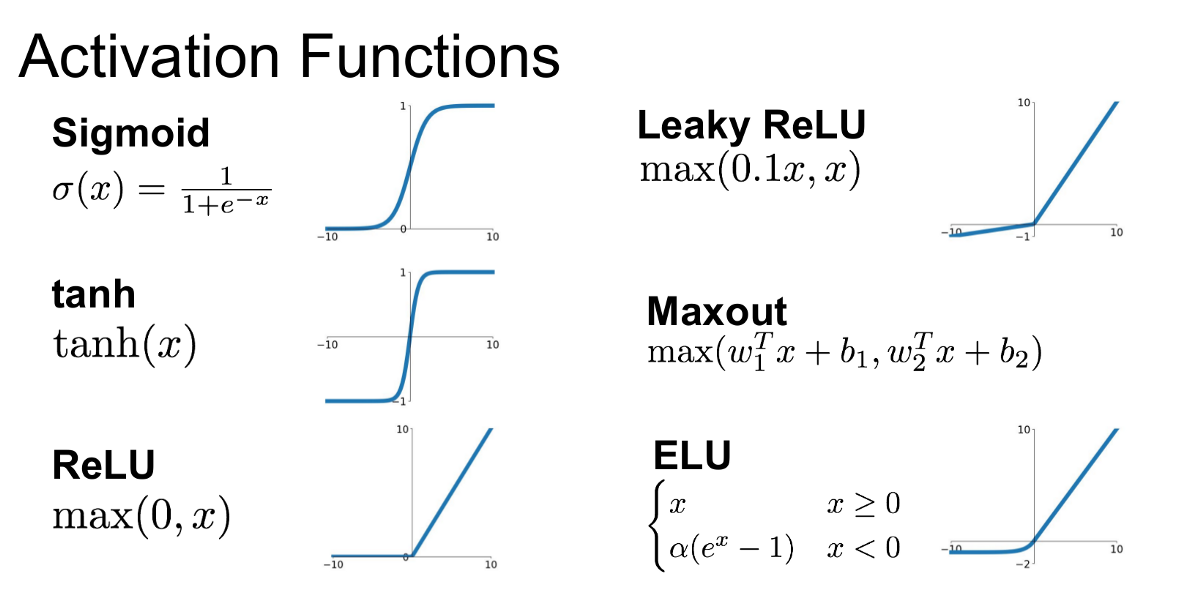

https://i.sstatic.net/ezK5z.jpg

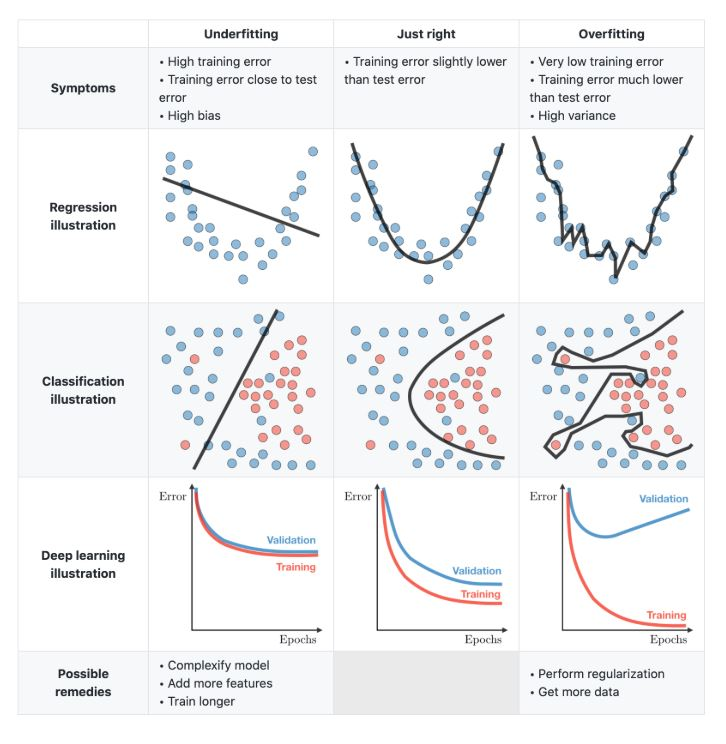